<a href="https://colab.research.google.com/github/KennyZhang-17/PA03K1/blob/master/Copy_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df1 = pd.read_csv(url)
world_url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"
df1_world = pd.read_csv(world_url)
df1_ca=df1_world[df1_world["Country"]=="Canada"]

df1_ca['Date'] = pd.to_datetime(df1_ca['Date'])
start_date = '03-12-2020'
end_date = '04-06-2020'
mask = (df1_ca['Date'] > start_date) & (df1_ca['Date'] <= end_date)
df_tailored_ca=df1_ca[mask]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
#df1.head()
df1_ca.head()

,Date,Country,Confirmed,Recovered,Deaths
32,2020-01-22,Canada,0,0,0
216,2020-01-23,Canada,0,0,0
400,2020-01-24,Canada,0,0,0
584,2020-01-25,Canada,0,0,0
768,2020-01-26,Canada,1,0,0


In [0]:
df1.count()

date      1829
state     1829
fips      1829
cases     1829
deaths    1829
dtype: int64

In [0]:
df1['date'] = pd.to_datetime(df1['date'])
start_date = '03-12-2020'
end_date = '04-06-2020'
mask = (df1['date'] > start_date) & (df1['date'] <= end_date)
df_tailored=df1[mask]

In [0]:
#df_tailored.head()
df_tailored_ca[1:20]
#df=df_tailored[df_tailored["state"]=="California"]
#df.head()

,Date,Country,Confirmed,Recovered,Deaths
9600,2020-03-14,Canada,198,8,1
9784,2020-03-15,Canada,252,8,1
9968,2020-03-16,Canada,415,9,4
10152,2020-03-17,Canada,478,9,5
10336,2020-03-18,Canada,657,9,8
10520,2020-03-19,Canada,800,9,9
10704,2020-03-20,Canada,943,9,12
10888,2020-03-21,Canada,1277,10,19
11072,2020-03-22,Canada,1469,10,21
11256,2020-03-23,Canada,2088,10,25


In [0]:
df_california=df[["date","state","cases"]]
df_canada= df_tailored_ca.rename(columns={'Date': 'date','Confirmed':'cases','Country':'state'})
df_canada=df_canada[["date","state","cases"]]

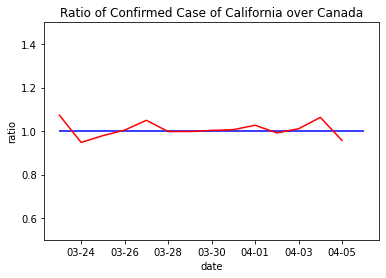

In [0]:
df_canada_california=df_canada.append(df_california)
df_canada_california.head()

result = pd.merge(df_california,
                 df_canada,
                 on='date')
result.head()
result["ratio"]=result["cases_x"]/result["cases_y"]
result.head()
#result["date"].count()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
ax = plt.gca()
formatter = mdates.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator(interval=2)
ax.xaxis.set_major_locator(locator)

plt.plot(result["date"][10:24],result["ratio"][10:24],color="r")
plt.gca().set_ylim(.5, 1.5)
plt.hlines(1,result["date"][10],result["date"][24], color="b")
plt.xlabel("date")
plt.ylabel("ratio")
plt.title("Ratio of Confirmed Case of California over Canada")
plt.show()

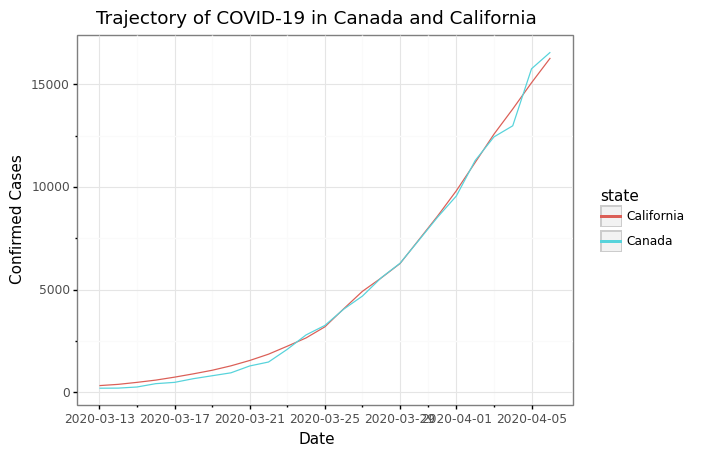

<ggplot: (-9223363264788107516)>

In [0]:
df=df_tailored[df_tailored["state"]=="California"]
df2=df_tailored[df_tailored["state"]=="New York"]
df3=df_tailored[df_tailored["state"]=="Massachusetts"]
df4=df_tailored[df_tailored["state"]=="Michigan"]

df.head()
from plotnine import *
(ggplot(df_canada_california)        
 + aes(x='date', y='cases',colour='state')+geom_line()
 + theme_bw()+labs(x="Date", y="Confirmed Cases")+ggtitle("Trajectory of COVID-19 in Canada and California")
)

In [0]:
df["lag"]=df["cases"].shift(-1)-df["cases"]
df["lag"]=df["lag"].shift(1)
df=df[1:df.count()[1]-1]

df2["lag"]=df2["cases"].shift(-1)-df2["cases"]
df2["lag"]=df2["lag"].shift(1)
df2=df2[1:df2.count()[1]-1]

df3["lag"]=df3["cases"].shift(-1)-df3["cases"]
df3["lag"]=df3["lag"].shift(1)
df3=df3[1:df3.count()[1]-1]

df4["lag"]=df4["cases"].shift(-1)-df4["cases"]
df4["lag"]=df4["lag"].shift(1)
df4=df4[1:df4.count()[1]-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
df4.head()

,date,state,fips,cases,deaths,lag
512,2020-03-11,Michigan,26,2,0,0.0
559,2020-03-12,Michigan,26,12,0,10.0
608,2020-03-13,Michigan,26,25,0,13.0
659,2020-03-14,Michigan,26,33,0,8.0
712,2020-03-15,Michigan,26,53,0,20.0


In [0]:

df.count()

date      33
state     33
fips      33
cases     33
deaths    33
lag       33
dtype: int64

In [0]:
from plotnine import *

In [0]:
 df = df.append(df2)
 df = df.append(df3)
 df = df.append(df4)
 df


,date,state,fips,cases,deaths,lag
641,2020-03-14,California,6,381,5,61.0
693,2020-03-15,California,6,478,6,97.0
746,2020-03-16,California,6,588,11,110.0
799,2020-03-17,California,6,732,14,144.0
853,2020-03-18,California,6,893,17,161.0
...,...,...,...,...,...,...
1522,2020-03-30,Michigan,26,6508,197,1022.0
1577,2020-03-31,Michigan,26,7630,264,1122.0
1632,2020-04-01,Michigan,26,9293,336,1663.0
1687,2020-04-02,Michigan,26,10791,417,1498.0


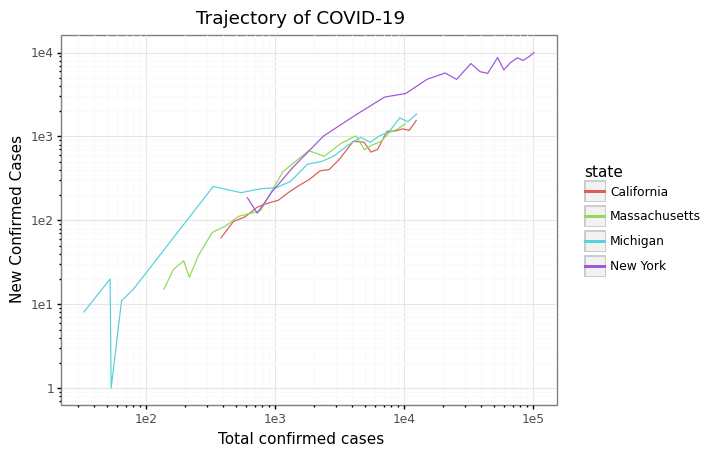

<ggplot: (8794905321494)>

In [0]:
(ggplot(df)        
 + aes(x='cases', y='lag',colour='state')+geom_line()
 + theme_bw()+labs(x="Total Confirmed Cases", y="New Confirmed Cases")+ggtitle("Trajectory of COVID-19")+
 scale_x_continuous(trans='log10') +
  scale_y_continuous(trans='log10')
)

In [0]:
``